<a href="https://colab.research.google.com/github/dvinzed/Python_Lab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.QYYSFQ_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.QYYSFQ_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 - 10s - 19ms/step - accuracy: 0.9038 - loss: 0.3369 - val_accuracy: 0.9553 - val_loss: 0.1608
Epoch 2/10
540/540 - 5s - 9ms/step - accuracy: 0.9591 - loss: 0.1373 - val_accuracy: 0.9668 - val_loss: 0.1130
Epoch 3/10
540/540 - 6s - 11ms/step - accuracy: 0.9700 - loss: 0.0970 - val_accuracy: 0.9742 - val_loss: 0.0876
Epoch 4/10
540/540 - 5s - 9ms/step - accuracy: 0.9778 - loss: 0.0740 - val_accuracy: 0.9767 - val_loss: 0.0745
Epoch 5/10
540/540 - 5s - 10ms/step - accuracy: 0.9813 - loss: 0.0597 - val_accuracy: 0.9792 - val_loss: 0.0679
Epoch 6/10
540/540 - 9s - 18ms/step - accuracy: 0.9850 - loss: 0.0490 - val_accuracy: 0.9830 - val_loss: 0.0559
Epoch 7/10
540/540 - 6s - 11ms/step - accuracy: 0.9868 - loss: 0.0415 - val_accuracy: 0.9872 - val_loss: 0.0454
Epoch 8/10
540/540 - 5s - 9ms/step - accuracy: 0.9901 - loss: 0.0320 - val_accuracy: 0.9878 - val_loss: 0.0403
Epoch 9/10
540/540 - 7s - 12ms/step - accuracy: 0.9912 - loss: 0.0282 - val_accuracy: 0.9865 - val_loss: 0.0429
Epoch

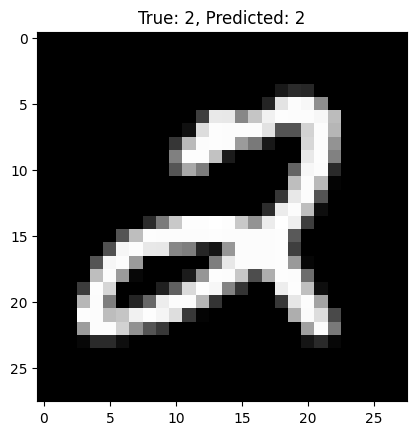

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9794 - loss: 0.0756
Test accuracy: 97.94%


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']


num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)


def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label


scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)


BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)


validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)


BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)


validation_inputs, validation_targets = next(iter(validation_data))
input_size = 784
output_size = 10
hidden_layer_size = 100

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUM_EPOCHS = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

history = model.fit(
    train_data,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    validation_data=(validation_inputs, validation_targets),
    verbose=2
)

for test_images, test_labels in test_data.take(1):
    sample_image = test_images[0].numpy()
    sample_label = test_labels[0].numpy()


predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)


plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f'True: {sample_label}, Predicted: {predicted_label}')
plt.show()
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy*100:.2f}%')